In [80]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [81]:
income_df = pd.read_csv('/home/student/IngajiDemo/dataset.csv')

In [82]:
income_df['Household_Head_Occupation'] = income_df.groupby('Household_Head_Highest_Grade_Completed')['Household_Head_Occupation'].transform(lambda x: x.ffill().bfill())

In [83]:
income_df['Total_Number_of_Family_members'] = income_df.groupby('Type_of_Household')['Total_Number_of_Family_members'].transform(lambda x: x.ffill().bfill())

In [84]:
income_df['Toilet_Facilities'] = income_df.groupby('Total_Number_of_Family_members')['Toilet_Facilities'].transform(lambda x: x.ffill().bfill())

In [85]:
income_df['Household_Head_Class_of_Worker'] = income_df.groupby('Household_Head_Occupation')['Household_Head_Class_of_Worker'].transform(lambda x: x.ffill().bfill())

In [8]:
# print(income_df.isna().sum())

In [86]:
income_df.rename(columns={
    'Total_Food_Expenditure': 'total_food_expenditure', 
    'Bread_and_Cereals_Expenditure': 'bread_and_cereals_expenditure',
    'Total_Rice_Expenditure': 'total_rice_expenditure',
    'Meat_Expenditure': 'meat_expenditure',
    'Total_Fish_and__marine_products_Expenditure': 'total_fish_and_marine_products_expenditure',
    'Fruit_Expenditure': 'fruit_expenditure',
    'Vegetables_Expenditure': 'vegetables_expenditure',
    'Restaurant_and_hotels_Expenditure': 'restaurant_and_hotels_expenditure',
    'Alcoholic_Beverages_Expenditure': 'alcoholic_beverages_expenditure',
    'Tobacco_Expenditure': 'tobacco_expenditure',
    'Clothing,_Footwear_and_Other_Wear_Expenditure': 'clothing_footwear_and_other_wear_expenditure',
    'Housing_and_water_Expenditure': 'housing_and_water_expenditure',
    'Medical_Care_Expenditure': 'medical_care_expenditure',
    'Transportation_Expenditure': 'transportation_expenditure',
    'Communication_Expenditure': 'communication_expenditure',
    'Education_Expenditure': 'education_expenditure',
    'Miscellaneous_Goods_and_Services_Expenditure': 'miscellaneous_goods_and_services_expenditure',
    'Special_Occasions_Expenditure': 'special_occasions_expenditure',
    'Main_Source_of_Income': 'main_source_of_income',
    'Household_Head_Highest_Grade_Completed': 'household_head_highest_grade_completed',
    'Household_Head_Occupation': 'household_head_occupation',
    'Tenure_Status': 'tenure_status',
    'Type_of_Building/House': 'type_of_building_house',
    'Type_of_Household': 'type_of_household',
    'Household_Head_Class_of_Worker': 'household_head_class_of_worker',
    'Total_Household_Income': 'total_household_income',
    'Total_Expenditures': 'total_expenditures',
    'Crop_Farming_and_Gardening_expenses': 'crop_farming_and_gardening_expenses'
}, inplace=True)

In [87]:
# Filter for farmers' occupations
farmer_occupations = [
    'Farmers', 'Agricultural laborers', 'Rice farmers', 'Crop Farming and Gardening',
    'Livestock farmers', 'Agricultural technicians', 'Farmhands and laborers', 'Hog raising farmers'
]

In [88]:
farmers_df = income_df[income_df['household_head_occupation'].isin(farmer_occupations)].copy()

In [89]:
expenditure_columns = [
    'bread_and_cereals_expenditure',
    'total_rice_expenditure',
    'meat_expenditure',
    'total_fish_and_marine_products_expenditure',
    'fruit_expenditure',
    'vegetables_expenditure',
    'restaurant_and_hotels_expenditure',
    'alcoholic_beverages_expenditure',
    'tobacco_expenditure',
    'clothing_footwear_and_other_wear_expenditure',
    'housing_and_water_expenditure',
    'medical_care_expenditure',
    'transportation_expenditure',
    'communication_expenditure',
    'education_expenditure',
    'miscellaneous_goods_and_services_expenditure',
    'special_occasions_expenditure',
    'crop_farming_and_gardening_expenses'
]

In [90]:
farmers_df['total_expenditures'] = farmers_df[expenditure_columns].sum(axis=1)

In [93]:
farmers_df['remaining_income'] = farmers_df['total_household_income'] - farmers_df['total_expenditures']

In [94]:
data_for_clustering = farmers_df[['remaining_income']].copy()
data_for_clustering = data_for_clustering[data_for_clustering['remaining_income'] > 0]

In [96]:
# Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

In [97]:
# Performing hierarchical clustering
Z = linkage(scaled_data, method='ward')

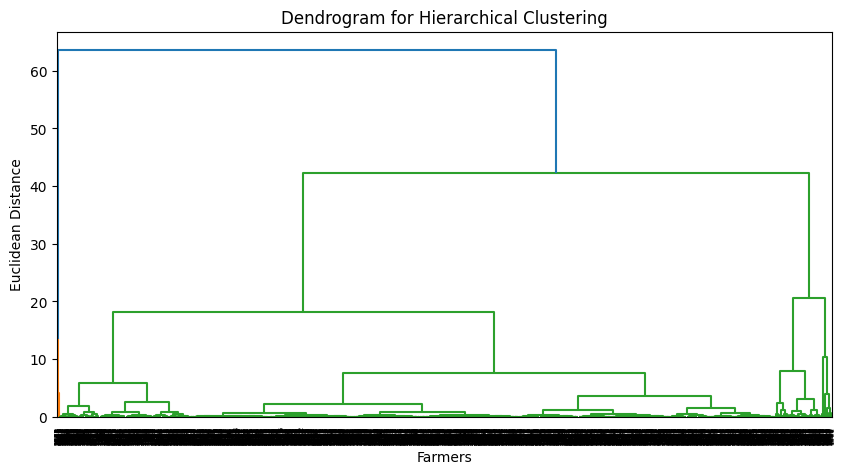

In [98]:
# Create Dendrogram for visualization
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Farmers')
plt.ylabel('Euclidean Distance')
plt.show()

In [99]:
farmers_df['cluster'] = fcluster(Z, t=3, criterion='maxclust')

# Assign Credit Scores
farmers_df['credit_score'] = farmers_df['cluster'].apply(assign_credit_score)

NameError: name 'fcluster' is not defined

In [ ]:
#  Determine Loan Range
def determine_loan_range(row):
    if row['remaining_income'] < 0:
        return "Not Eligible"
    elif row['credit_score'] == 5:
        return "Up to 100,000"
    elif row['credit_score'] == 3:
        return "Up to 50,000"
    else:
        return "Not Eligible"

In [ ]:
farmers_df['loan_range'] = farmers_df.apply(determine_loan_range, axis=1)

# Display the updated DataFrame with clusters, credit scores, and loan ranges
print(farmers_df[['remaining_income', 'credit_score', 'loan_range']])